In [1]:
import emoji

In [2]:
emoji.UNICODE_EMOJI

{'🥇': ':1st_place_medal:',
 '🥈': ':2nd_place_medal:',
 '🥉': ':3rd_place_medal:',
 '🆎': ':AB_button_(blood_type):',
 '🏧': ':ATM_sign:',
 '🅰': ':A_button_(blood_type):',
 '🇦🇫': ':Afghanistan:',
 '🇦🇱': ':Albania:',
 '🇩🇿': ':Algeria:',
 '🇦🇸': ':American_Samoa:',
 '🇦🇩': ':Andorra:',
 '🇦🇴': ':Angola:',
 '🇦🇮': ':Anguilla:',
 '🇦🇶': ':Antarctica:',
 '🇦🇬': ':Antigua_&_Barbuda:',
 '♒': ':Aquarius:',
 '🇦🇷': ':Argentina:',
 '♈': ':Aries:',
 '🇦🇲': ':Armenia:',
 '🇦🇼': ':Aruba:',
 '🇦🇨': ':Ascension_Island:',
 '🇦🇺': ':Australia:',
 '🇦🇹': ':Austria:',
 '🇦🇿': ':Azerbaijan:',
 '🔙': ':BACK_arrow:',
 '🅱': ':B_button_(blood_type):',
 '🇧🇸': ':Bahamas:',
 '🇧🇭': ':Bahrain:',
 '🇧🇩': ':Bangladesh:',
 '🇧🇧': ':Barbados:',
 '🇧🇾': ':Belarus:',
 '🇧🇪': ':Belgium:',
 '🇧🇿': ':Belize:',
 '🇧🇯': ':Benin:',
 '🇧🇲': ':Bermuda:',
 '🇧🇹': ':Bhutan:',
 '🇧🇴': ':Bolivia:',
 '🇧🇦': ':Bosnia_&_Herzegovina:',
 '🇧🇼': ':Botswana:',
 '🇧🇻': ':Bouvet_Island:',
 '🇧🇷': ':Brazil:',
 '🇮🇴': ':British_Indian_Ocean_Territory:',
 '🇻🇬': ':British_Vir

In [3]:
emoji_dict={"0":"\u2764\uFE0F",
            "1":":baseball:",
            "2":":grinning_face_with_big_eyes:",
            "3":":disappointed_face:",
            "4":":fork_and_knife:",
            "5":":hundred_points:"}

In [4]:
for e in emoji_dict.values():
    print(emoji.emojize(e))

❤️
⚾
😃
😞
🍴
💯


In [5]:
import pandas as pd

In [6]:
train=pd.read_csv("emoji_train.csv",header=None)

In [7]:
test=pd.read_csv("emoji_test.csv",header=None)

In [8]:
train.head(10)

,0,1,2,3
0,never talk to me again,3,NaN,NaN
1,I am proud of your achievements,2,NaN,NaN
2,It is the worst day in my life,3,NaN,NaN
3,Miss you so much,0,NaN,[0]
4,food is life,4,NaN,NaN
5,I love you mum,0,NaN,NaN
6,Stop saying bullshit,3,NaN,NaN
7,congratulations on your acceptance,2,NaN,NaN
8,The assignment is too long,3,NaN,NaN
9,I want to go play,1,NaN,[3]


In [9]:
x_train,y_train=train[0],train[1]

In [10]:
x_test,y_test=test[0],test[1]

In [11]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(132,) (132,) (56,) (56,)


In [12]:
print(type(x_train[0]))

<class 'str'>


In [13]:
x_train[0].split()

['never', 'talk', 'to', 'me', 'again']

In [14]:
for i in range(5):
    print(x_train[i],emoji.emojize(emoji_dict[str(y_train[i])]))

never talk to me again 😞
I am proud of your achievements 😃
It is the worst day in my life 😞
Miss you so much ❤️
food is life 🍴


In [15]:
f=open("glove.6B.50d.txt",encoding="utf-8")

In [16]:
import numpy as np
import keras

Using TensorFlow backend.


In [17]:
embedding_dict={}
count=0;
for line in f:
    values=line.split()
    word=values[0]
    coef=np.array(values[1:],dtype='float')
    embedding_dict[word]=coef
    count+=1

print(count)
    

400000


In [18]:
embedding_dict['the']

array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
       -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
        2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
        1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
       -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
       -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
        4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
        7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
       -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
        1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01])

In [19]:
print(embedding_dict['the'].shape)

(50,)


In [20]:
def embedding(X):
    maxlen=10
    breadth=50 #height
    no_of_sents=X.shape[0]
    embedding_matrix=np.zeros((no_of_sents,maxlen,breadth))
    
    for ix in range(X.shape[0]):
        X[ix]=X[ix].split() 
        for ij in range(len(X[ix])):
            try:
                embedding_matrix[ix][ij]=embedding_dict[X[ix][ij].lower()]
            except:
                embedding_matrix[ix][ij]=np.zeros((50))
            
            
    return embedding_matrix

In [21]:
embedding_matrix_train=embedding(x_train)

c:\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
embedding_matrix_test=embedding(x_test)

c:\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
print(embedding_matrix_train.shape,embedding_matrix_test.shape)

(132, 10, 50) (56, 10, 50)


In [24]:
from keras.models import Sequential

In [25]:
from keras.layers import*

In [26]:
model=Sequential()
model.add(LSTM(64,input_shape=(10,50),return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128,return_sequences=True))
model.add(Dropout(0.25))
model.add(LSTM(256,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64,return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(5,activation='softmax'))
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 64)            29440     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 64)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 128)           98816     
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 128)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 10, 256)           394240    
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 256)           0         
_______________________________________

In [27]:
from keras.utils import to_categorical

In [28]:
print(y_train.shape,y_test.shape)

(132,) (56,)


In [29]:
y_train=to_categorical(y_train,num_classes=5)
y_test=to_categorical(y_test,num_classes=5)

In [30]:
print(y_train.shape,y_test.shape)

(132, 5) (56, 5)


In [31]:
from keras.callbacks import EarlyStopping

In [32]:
from keras.callbacks import ModelCheckpoint

In [33]:
checkpoint=ModelCheckpoint("best_model_for_emoji.h5",monitor="val_loss",verbose=True,save_best_only=True)

In [34]:
earlystop=EarlyStopping(monitor='val_accuracy',patience=10)

In [35]:
hist=model.fit(embedding_matrix_train,y_train,epochs=100,shuffle=True,batch_size=64,validation_split=0.2,callbacks=[checkpoint,earlystop])


Train on 105 samples, validate on 27 samples
Epoch 1/100
105/105 [==============================] - 1s 10ms/step - loss: 1.5973 - accuracy: 0.3143 - val_loss: 1.6237 - val_accuracy: 0.2222

Epoch 00001: val_loss improved from inf to 1.62366, saving model to best_model_for_emoji0.h5
Epoch 2/100
105/105 [==============================] - 0s 1ms/step - loss: 1.5513 - accuracy: 0.3619 - val_loss: 1.6509 - val_accuracy: 0.2222

Epoch 00002: val_loss did not improve from 1.62366
Epoch 3/100
105/105 [==============================] - 0s 1ms/step - loss: 1.5129 - accuracy: 0.4095 - val_loss: 1.7116 - val_accuracy: 0.2593

Epoch 00003: val_loss did not improve from 1.62366
Epoch 4/100
105/105 [==============================] - 0s 1ms/step - loss: 1.4930 - accuracy: 0.3143 - val_loss: 1.7587 - val_accuracy: 0.2222

Epoch 00004: val_loss did not improve from 1.62366
Epoch 5/100
105/105 [==============================] - 0s 1ms/step - loss: 1.4977 - accuracy: 0.3810 - val_loss: 1.7123 - val_accur

105/105 [==============================] - 0s 1ms/step - loss: 0.2428 - accuracy: 0.9143 - val_loss: 1.3645 - val_accuracy: 0.6296

Epoch 00039: val_loss did not improve from 0.87807
Epoch 40/100
105/105 [==============================] - 0s 1ms/step - loss: 0.4130 - accuracy: 0.8381 - val_loss: 1.3114 - val_accuracy: 0.5556

Epoch 00040: val_loss did not improve from 0.87807
Epoch 41/100
105/105 [==============================] - 0s 997us/step - loss: 0.2378 - accuracy: 0.9143 - val_loss: 1.1454 - val_accuracy: 0.7037

Epoch 00041: val_loss did not improve from 0.87807
Epoch 42/100
105/105 [==============================] - 0s 988us/step - loss: 0.2194 - accuracy: 0.9524 - val_loss: 1.3170 - val_accuracy: 0.6296

Epoch 00042: val_loss did not improve from 0.87807
Epoch 43/100
105/105 [==============================] - 0s 1ms/step - loss: 0.2962 - accuracy: 0.9143 - val_loss: 1.3952 - val_accuracy: 0.5926

Epoch 00043: val_loss did not improve from 0.87807
Epoch 44/100
105/105 [=======

In [36]:
import matplotlib.pyplot as plt

In [37]:
hist=hist.history

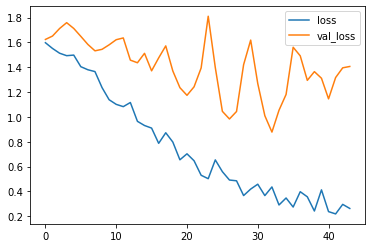

In [38]:
plt.plot(hist['loss'],label='loss')
plt.plot(hist['val_loss'],label='val_loss')
plt.legend()
plt.show()

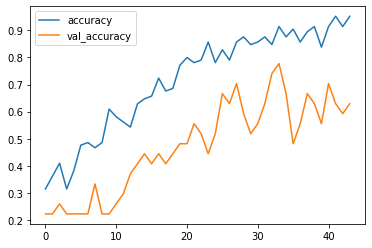

In [39]:
plt.plot(hist['accuracy'],label='accuracy')
plt.plot(hist['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()


In [41]:
model.load_weights("best_model_for_emoji0.h5")

In [42]:
model.evaluate(embedding_matrix_test,y_test)

56/56 [==============================] - 0s 499us/step


[1.1978844148772103, 0.5714285969734192]

In [43]:
predicteds=model.predict_classes(embedding_matrix_test)

In [44]:
for i in range(50):
    print(' '.join(x_test[i]))
    print(emoji.emojize(emoji_dict[str(np.argmax(y_test[i]))]))
    print(emoji.emojize(emoji_dict[str(predicteds[i])]))
    

I want to eat
🍴
🍴
he did not answer
😞
😞
he got a raise
😃
⚾
she got me a present
❤️
❤️
ha ha ha it was so funny
😃
😃
he is a good friend
❤️
😃
I am upset
❤️
⚾
We had such a lovely dinner tonight
❤️
😃
where is the food
🍴
😃
Stop making this joke ha ha ha
😃
😃
where is the ball
⚾
⚾
work is hard
😞
😃
This girl is messing with me
😞
❤️
are you serious ha ha
😃
😞
Let us go play baseball
⚾
⚾
This stupid grader is not working
😞
😞
work is horrible
😞
😞
Congratulation for having a baby
😃
😃
stop messing around
😞
😞
any suggestions for dinner
🍴
😃
I love taking breaks
❤️
❤️
you brighten my day
😃
❤️
I boiled rice
🍴
🍴
she is a bully
😞
❤️
Why are you feeling bad
😞
😞
I am upset
😞
⚾
I worked during my birthday
😞
😃
My grandmother is the love of my life
❤️
❤️
enjoy your break
😃
🍴
valentine day is near
❤️
😃
I miss you so much
❤️
❤️
throw the ball
⚾
⚾
My life is so boring
😞
❤️
she said yes
😃
😃
will you be my valentine
❤️
❤️
he can pitch really well
⚾
⚾
dance with me
😃
😃
I am starving
🍴
😞
See you at the restaurant
🍴
